In [1]:
print("here we go again")

here we go again


In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/2/Documents/GitHub/Movie-Genre-Predictor/folder/MovieGenre.csv", encoding='ISO-8859-1')
df.head(10)

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...
5,113277,http://www.imdb.com/title/tt113277,Heat (1995),8.2,Action|Crime|Drama,https://images-na.ssl-images-amazon.com/images...
6,114319,http://www.imdb.com/title/tt114319,Sabrina (1995),6.3,Comedy|Drama,https://images-na.ssl-images-amazon.com/images...
7,112302,http://www.imdb.com/title/tt112302,Tom and Huck (1995),5.6,Adventure|Comedy|Drama,https://images-na.ssl-images-amazon.com/images...
8,114576,http://www.imdb.com/title/tt114576,Sudden Death (1995),5.7,Action|Crime|Thriller,https://images-na.ssl-images-amazon.com/images...
9,113189,http://www.imdb.com/title/tt113189,GoldenEye (1995),7.2,Action|Adventure|Thriller,https://images-na.ssl-images-amazon.com/images...


In [4]:
# imdbID (ID of film) | Imdb Link (url to the film) | Title (title + year) | IMDB Score (0-10 rating) | Genre (cluster of genre tags) | Poster (link to image)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40106 entries, 0 to 40105
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   imdbId      40106 non-null  int64  
 1   Imdb Link   40106 non-null  object 
 2   Title       40106 non-null  object 
 3   IMDB Score  40058 non-null  float64
 4   Genre       39961 non-null  object 
 5   Poster      39381 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ MB


In [6]:
df = df.sample(n=1000, random_state=1) # i do not want 40K pictures, so i will reduce the dataset randomly

In [7]:
df.isna().sum() # there are 20 movies with no posters whatsoever. I will be dropping those

imdbId         0
Imdb Link      0
Title          0
IMDB Score     0
Genre          3
Poster        20
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

imdbId        0
Imdb Link     0
Title         0
IMDB Score    0
Genre         0
Poster        0
dtype: int64

In [11]:
import requests
import os

def downloadImages(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)

os.makedirs('C:/Users/2/Documents/GitHub/Movie-Genre-Predictor/folder/SampleMoviePosters', exist_ok=True)

for _, row in df.iterrows():
    imdbId = row['imdbId']
    poster_url = row['Poster']

    filename = f'C:/Users/2/Documents/GitHub/Movie-Genre-Predictor/folder/SampleMoviePosters/{imdbId}.jpg'

    downloadImages(poster_url, filename)


In [12]:
unique_genres = df['Genre'].str.split('|').explode().unique()
print(unique_genres) 
print(len(unique_genres))

['Comedy' 'Crime' 'Drama' 'Romance' 'Documentary' 'Mystery' 'Sci-Fi'
 'Fantasy' 'Horror' 'History' 'Musical' 'Family' 'Thriller' 'Action'
 'Western' 'Film-Noir' 'Music' 'War' 'Biography' 'Adventure' 'Short'
 'Sport' 'Animation' 'News' 'Adult']
25


In [13]:
df_genres = df['Genre'].str.get_dummies(sep='|')
df = pd.concat([df, df_genres], axis=1)

df.head(10)

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,Action,Adult,Adventure,Animation,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
18769,68306,http://www.imdb.com/title/tt68306,Bone (1972),6.9,Comedy,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13411,91497,http://www.imdb.com/title/tt91497,Mauvais Sang (1986),7.3,Crime|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
33851,4341532,http://www.imdb.com/title/tt4341532,Phoenix Incident (2015),5.5,Documentary|Mystery|Sci-Fi,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3632,143422,http://www.imdb.com/title/tt143422,American Virgin (1999),3.6,Comedy,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11202,13579,http://www.imdb.com/title/tt13579,Schatten - Eine ní_chtliche Halluzination (1923),7.0,Drama|Fantasy|Horror,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15973,1263679,http://www.imdb.com/title/tt1263679,Firaaq (2008),7.4,Drama|History,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23378,177293,http://www.imdb.com/title/tt177293,To xylo vgike apo ton Paradeiso (1959),7.0,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
39460,1068632,http://www.imdb.com/title/tt1068632,Agathe ClÌ©ry (2008),4.6,Comedy|Musical,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
38234,2188926,http://www.imdb.com/title/tt2188926,Strawberry Summer (2012),5.9,Family,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7303,76301,http://www.imdb.com/title/tt76301,The Late Show (1977),7.0,Comedy|Mystery|Thriller,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [14]:
genre_counts = df[df.columns[6:]].sum(axis=0).to_list()
print(genre_counts)

[126, 1, 97, 46, 51, 324, 137, 80, 480, 60, 52, 15, 40, 92, 32, 32, 58, 2, 132, 50, 22, 20, 122, 22, 17]


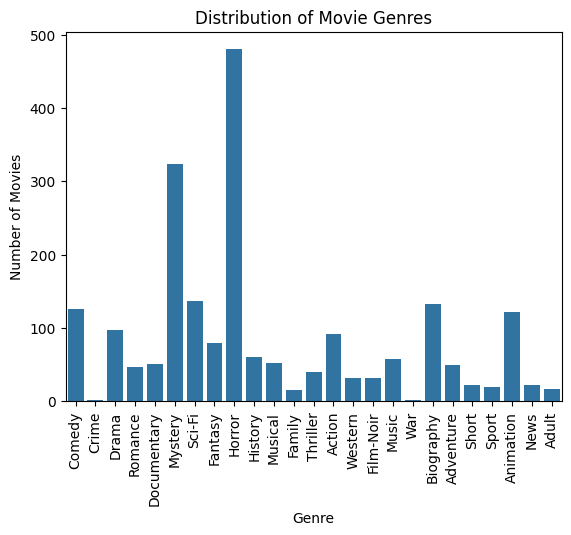

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=unique_genres, y=genre_counts)

plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=90)
plt.show()

In [16]:
# we don't need the entire dataframe, just the genres and the poster IDs
df_needed = df.drop(['Imdb Link', 'Title', 'IMDB Score', 'Genre', 'Poster'], axis=1)
df_needed.head(10)

,imdbId,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
18769,68306,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13411,91497,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
33851,4341532,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3632,143422,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11202,13579,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15973,1263679,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23378,177293,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
39460,1068632,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
38234,2188926,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7303,76301,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [19]:
import cv2
import os
import numpy as np

def read_images(folder_path):

  image_names = []
  images = []

  for filename in os.listdir(folder_path):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
      image_path = os.path.join(folder_path, filename)
      image = cv2.imread(image_path)

      if image is None:
        print(f"Error reading image: {filename}")
        continue

      image_names.append(filename)
      images.append([filename, image])

  return image_names, images

folder_path = "C:/Users/2/Documents/GitHub/Movie-Genre-Predictor/folder/SampleMoviePosters"
image_names, images = read_images(folder_path)

print(f"First image name: {image_names[0]}")
print(f"Image shape: {images[0][1].shape}")
